## Problem 1 Poisson equation (Sparse matrices)

## 50 pts

Consider a 2D Poisson equation
$$
\Delta u \equiv \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f, \quad (x,y)\in [0,1]^2
$$ 
with following boundary conditions
$$
u\big|_{x=0} = 0, \quad  u\big|_{x=1} = 0, \quad u\big|_{y=0} = 0, \quad u\big|_{y=1} = 0,
$$
with known function $f(x,y)$ and unknown $u(x,y)$.

To find solution of the Poisson equation we will use the **finite difference method**. Standard second order finite difference discretization on a uniform grid $(x_i, y_j) = (ih, jh)$, $i,j = 0,\dots, N$, $h = \frac{1}{N}$ leads to the following system of equations:
$$
\begin{split}
   &\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2} = f(ih,jh) \\
   &u_{0,j} = u_{i,0} = u_{N,j} = u_{i,N} = 0, \quad i,j = 1,\dots,N
\end{split}
$$

* Check that this system can be written in a matrix form
$$
A_h u_h = f_h,
$$
where 
$$u_h = (u_{1,1},\dots, u_{1,N-1} , u_{2,1},\dots, u_{2,N-1}, \dots, u_{N-1,1},\dots, u_{N-1,N-1})^T$$
$$f_h = (f_{1,1},\dots, f_{1,N-1} , f_{2,1},\dots, f_{2,N-1}, \dots, f_{N-1,1},\dots, f_{N-1,N-1})^T$$
and
$$ A_h = I\otimes a_h + a_h \otimes I, \quad a_h = \frac{1}{h^2}\mathrm{tridiag\left( 1,-2,1\right)},$$
where $\otimes$ denotes [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product).



* Choose $f(x,y)$ such that $u(x, y) = \sin\pi x \sin \pi y$ is a solution (just substitute $u$ in the Poisson equation and find $f$, then pretend as if you do not know the solution $u$ :)).


* Assemble matrix $A_h$ in the `CSR` format using functions from the `scipy.sparse` package (functions `scipy.sparse.kron` and `scipy.sparse.spdiags` might be helpful). <font color='red'> Do not use full matrices! Use only sparse arithmetics </font>


* Solve the system using the `scipy.sparse.linalg.spsolve` and make sure that you get solution close to the $u(x, y) = \sin\pi x \sin \pi y$ (the bigger $N$ you take, the closer to the $u(x, y) = \sin\pi x \sin \pi y$ you must be).


* Run `cg`, `minres`, `GMRES`, `BicgStab` iterative methods for this system for $N=256$ and make plots of residual w.r.t. number of iterations on one plot. Do not forget to provide label names. 


* What is the method of choice among `cg`, `minres`, `GMRES`, `BicgStab` for this problem? Why? Name advantages and disadvantages of these methods.


* Solve the system via an appropriate Krylov method with and without ILU preconditioner (play with different ILU preconditioners and find the one with the smallest number of iterations for this particular problem). To illustrate your answer plot residuals for different ILU preconditioners on one plot. Do you think that less iterations will give you reduced calculation time?


* **Bonus:** Find analytically eigenvalues of the matrix $A_h$ and prove that $\text{cond}( A_h )= \mathcal{O}\left(\frac{1}{h^2}\right)$

$A_h = I\otimes a_h + a_h \otimes I$

$A_h = \left(\begin{matrix} a_h & 0 & ... & 0\\ 0 & a_h & ... & 0\\ ... & ... & ... & ... \\0 & 0 & ... & a_h\end{matrix}\right) + \left(\begin{matrix} \dfrac{-2I}{h^2} & \dfrac{I}{h^2} & ... & 0\\ \dfrac{I}{h^2} & \dfrac{-2I}{h^2} & \dfrac{I}{h^2} & 0\\ ... & ... & ... & ... \\ 0 & ... & \dfrac{I}{h^2} & \dfrac{-2I}{h^2}\end{matrix}\right)$

We can see that $(I\otimes a_h) u_h = \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2}$ and $(a_h \otimes I) u_h = \dfrac{u_{i + 1,j} - 2u_{i,j} + u_{i - 1,j}}{h^2}$

So we can see that the system can be written in the given matrix form.

$u = sin(\pi x) sin(\pi y)$

$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f$

$f = -2 \pi^2 sin(\pi x) sin(\pi y)$

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg

def build_A(n, f = 'csr'):
    diag_rows = np.array([np.ones(n - 1), -2 * np.ones(n - 1), np.ones(n - 1)])
    positions = [-1, 0, 1]
    a_h = sp.sparse.spdiags(diag_rows, positions, n - 1, n - 1) * (n) ** 2
    I = sp.sparse.eye(n - 1)

    return sp.sparse.kron(I, a_h, format=f) + sp.sparse.kron(a_h, I, format=f)

print(build_A(4).todense())

[[-64.  16.   0.  16.   0.   0.   0.   0.   0.]
 [ 16. -64.  16.   0.  16.   0.   0.   0.   0.]
 [  0.  16. -64.   0.   0.  16.   0.   0.   0.]
 [ 16.   0.   0. -64.  16.   0.  16.   0.   0.]
 [  0.  16.   0.  16. -64.  16.   0.  16.   0.]
 [  0.   0.  16.   0.  16. -64.   0.   0.  16.]
 [  0.   0.   0.  16.   0.   0. -64.  16.   0.]
 [  0.   0.   0.   0.  16.   0.  16. -64.  16.]
 [  0.   0.   0.   0.   0.  16.   0.  16. -64.]]


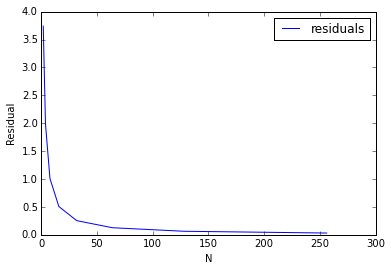

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def build_f(n):
    return -2 * np.pi ** 2 * np.kron(np.sin(np.pi * np.arange(1, n) / n), np.sin(np.pi * np.arange(1, n) / n))

def build_u(n):
    return build_f(n) / (-2 * np.pi ** 2)

N = [2 ** i for i in range(1, 9)]
residuals = []

for n in N:
    b = build_f(n)
    A = build_A(n)
    u_orig = build_u(n)
    u = sp.sparse.linalg.spsolve(A, b)
    residuals.append(np.linalg.norm(A.dot(u_orig) - b))
    

plt.ylabel('Residual')
plt.xlabel('N')
plt.plot(N, residuals, label='residuals')
plt.legend(loc='best')

In [22]:
n = 256
lp = build_A(n)
rhs = build_f(n)

res_cg = []
res_bicg = []
res_gmres = []
res_minres = []

def print_cg(x):
    res_cg.append(np.linalg.norm(lp.dot(x) - rhs))


def print_minres(x):
    res_minres.append(np.linalg.norm(lp.dot(x) - rhs))

    
def print_gmres(r):
    res_gmres.append(r)


def print_bicg(x):
    res_bicg.append(np.linalg.norm(lp.dot(x) - rhs))
    

scipy.sparse.linalg.gmres(lp, rhs, x0=np.random.random((n - 1) ** 2), restart=n, callback=print_gmres)
scipy.sparse.linalg.cg(lp, rhs, x0=np.random.random((n - 1) ** 2), callback=print_cg)
scipy.sparse.linalg.minres(lp, rhs, x0=np.random.random((n - 1) ** 2), callback=print_minres)
scipy.sparse.linalg.bicgstab(lp, rhs, x0=np.random.random((n - 1) ** 2), callback=print_bicg)
res_bicg = np.array(res_bicg) / res_bicg[0]
res_minres = np.array(res_minres) / res_minres[0]
res_cg = np.array(res_cg) / res_cg[0]

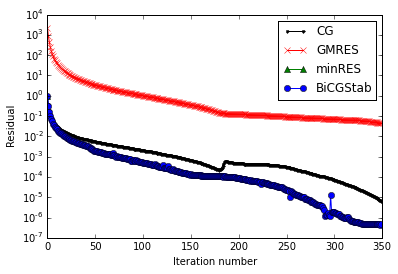

In [4]:
lim = 350
plt.semilogy(res_cg[:lim], marker='.', color='k', label='CG')
plt.semilogy(res_gmres[:lim], marker='x', color='r', label='GMRES')
plt.semilogy(res_minres[:lim], marker='^', color='g', label='minRES')
plt.semilogy(res_bicg[:lim], label='BiCGStab', marker='o')

plt.xlabel('Iteration number')
plt.ylabel('Residual')
plt.legend(loc='best')

The method of choice among cg, minres, GMRES, BicgStab for this problem is BiCGStab. It has the best convergence. CG only works for SPD matrices, and (sometimes) for symmetric matrices. It completely does not work for the non-symmetric matrices. The main disadvantage of GMRES: we have to store all the vectors, so the memory costs grows with each step. This problem is solved by restarts, generating new Krylov subspace. Minres works only for symmetric systems. Minres converges with one iteration. it is a mistake of the library. Also it was written in the documentation to scipy that minres function is expermental. 

TypeError: type not understood

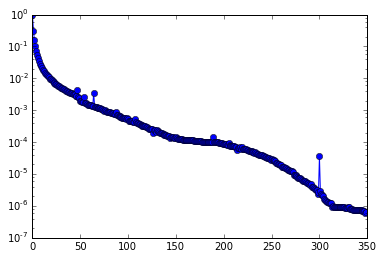

In [59]:
plt.semilogy(res_bicg[:lim], label='BiCGStab no ILU', marker='o')
n = 256
res_bicg_ilui = []
A = build_A(n, 'csc')
b = build_f(n)
lim = 350
parameters = [1]

def print_bicg_ilui(x):
    res_bicg_ilui.append(np.linalg.norm(A.dot(x) - b))

for p in parameters:
    res_bicg_ilui = []
    ilu = scipy.sparse.linalg.spilu(A)
    M_x = lambda x: ilu.solve(x)
    lo = scipy.sparse.linalg.LinearOperator(((n - 1) ** 2, (n - 1) ** 2), M_x)
    scipy.sparse.linalg.bicgstab(A, b, x0=np.random.random((n - 1) ** 2), callback=print_bicg_ilui, M = M_x)
    res_bicg_ilui = np.array(res_bicg_ilui) / res_bicg_ilui[0]
    plt.semilogy(res_bicg_ilui[:lim], label='BiCGStab ILU {0}'.format(p), marker='o')

plt.xlabel('Iteration number')
plt.ylabel('Residual')
plt.legend(loc='best')

In [58]:
lp = scipy.sparse.linalg.LinearOperator(((n - 1) ** 2, (n - 1) ** 2), lambda x: ilu.solve(x))
lp

<65025x65025 _CustomLinearOperator with dtype=float64>

## Problem 2 Deconvolution (Structured matrices)

## 50 pts + 30 pts

In the problem set 2 you were asked to find convolution of the Lena image with the following filter
$$
T_{i_1j_1i_2j_2} \equiv T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi} e^{-\alpha \left[(i_1 - j_1)^2 + (i_2 - j_2)^2 \right]}, \quad i_1,j_1, i_2, j_2 = 1,\dots, n, \quad \alpha = \frac{1}{50}
$$

* Write matvec function that produces multiplication of $T$ by a given vector $x$. Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so the function `np.reshape` will be usefull.


* Convolve Lena with $T$ for $\alpha = \frac{1}{100}$ using the obtained Linear Operator. Plot the result as an image.


* Run an appropriate Krylov method with the obtained Linear Operator and try to reconstruct Lena using the right hand side from the previous bullet (smoothed Lena). Plot norm of residual with respect to the number of iterations for different $\alpha$ and corresponding right hand side. Comment on the results.

Find image with your name in the attached to this problem set file. This image is the convolution with $T$ for $\alpha=\frac{1}{15}$ with small random noise:
<img src='noise.png' width=300>

The original image looks like
<img src='orig.png'>

It contains 3 code lines (e.g. yOu, ArE, aWEs0me).
Your goal now is to recognize these 3 codes. Each of them will give you extra 10 pts. Since the problem is very ill-posed you need some regularization techniques, such as Tikhonov regularization. 